In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:


# Load datasets
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# Add wine type column
red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"



# Combine into one dataframe
wine_df = pd.concat([red_wine, white_wine], axis=0)
wine_df.reset_index(drop=True, inplace=True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [29]:
wine_df.to_csv("winequality_combined.csv", index=False)

print("✅ Combined dataset saved as winequality_combined.csv")

✅ Combined dataset saved as winequality_combined.csv


In [30]:
data = pd.read_csv("winequality_combined.csv", sep=",")

In [31]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [33]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [34]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [35]:
columns =data.columns
cat_col=[]
num_col=[]
for column in columns:
    if data[column].nunique() <=25:
        cat_col.append(column)
    else:
        num_col.append(column)       

In [36]:
cat_col

['quality', 'wine_type']

In [37]:
num_col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

<Figure size 800x500 with 0 Axes>

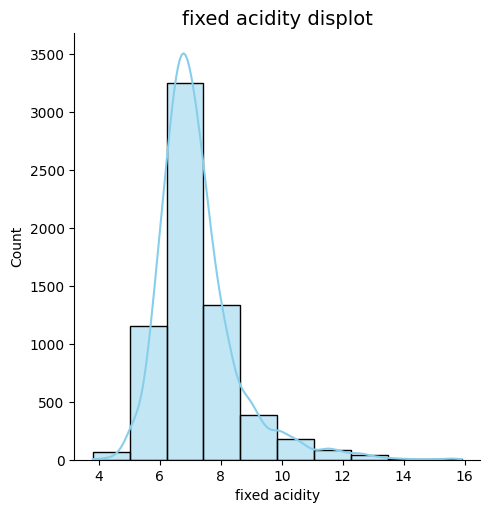

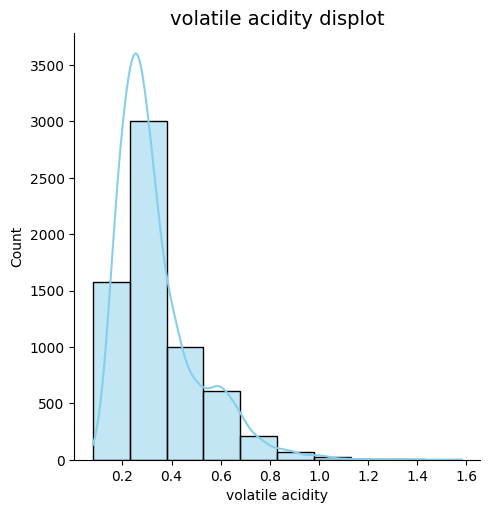

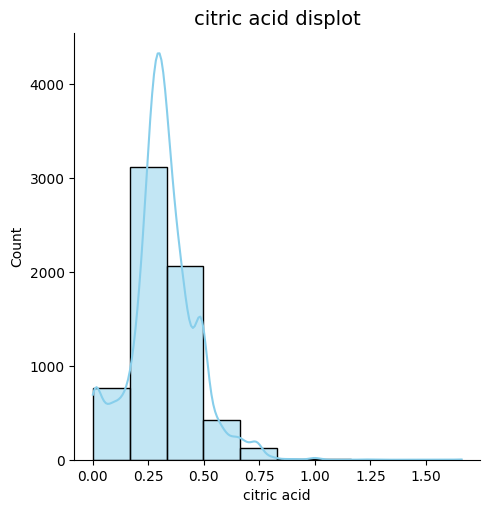

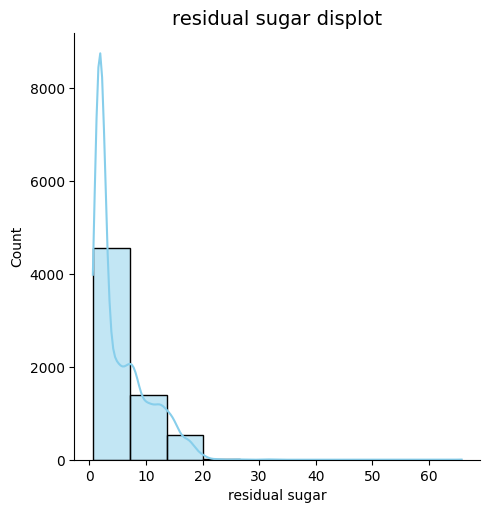

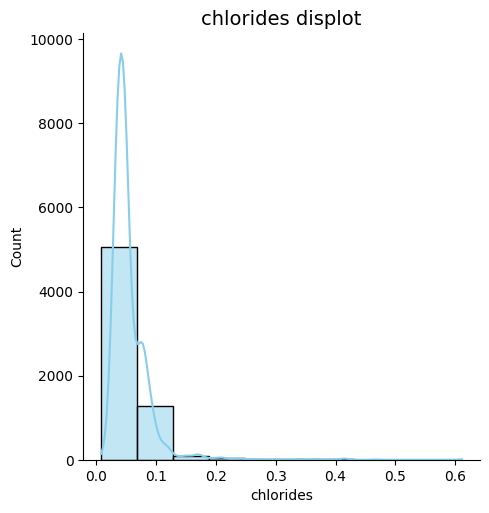

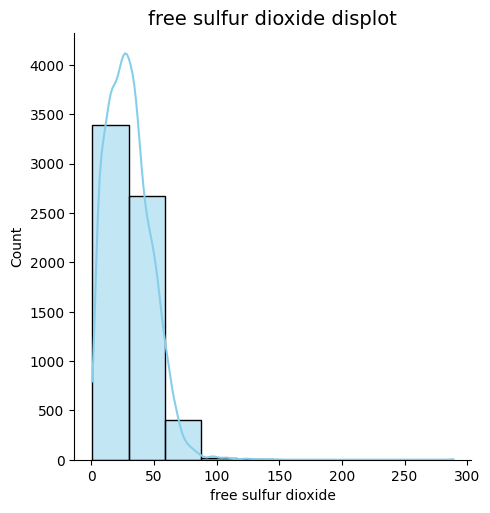

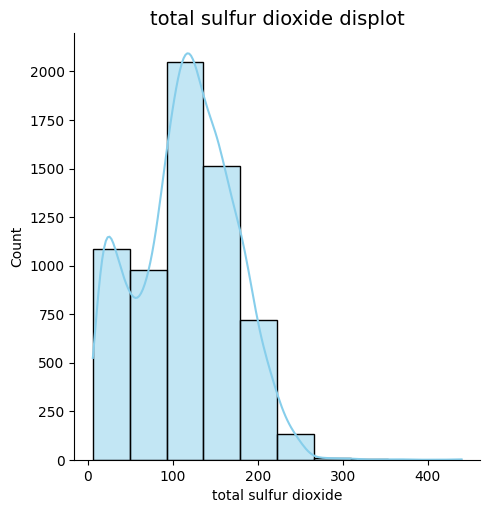

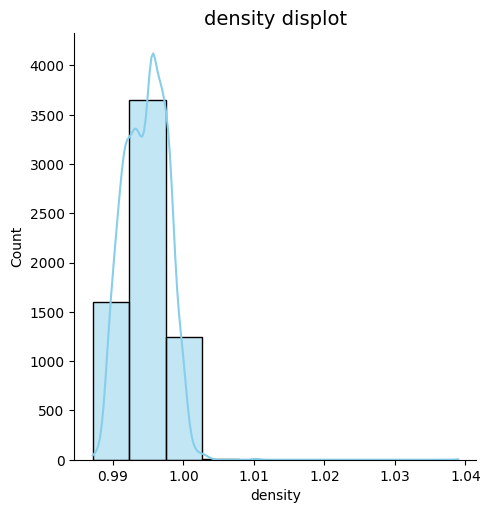

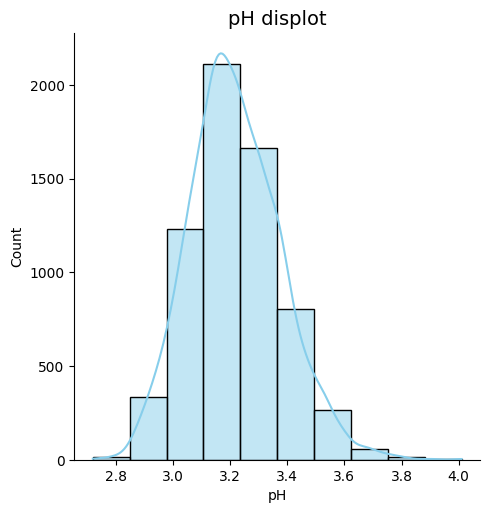

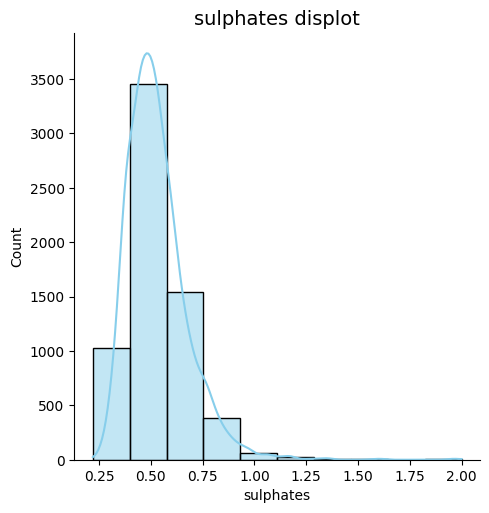

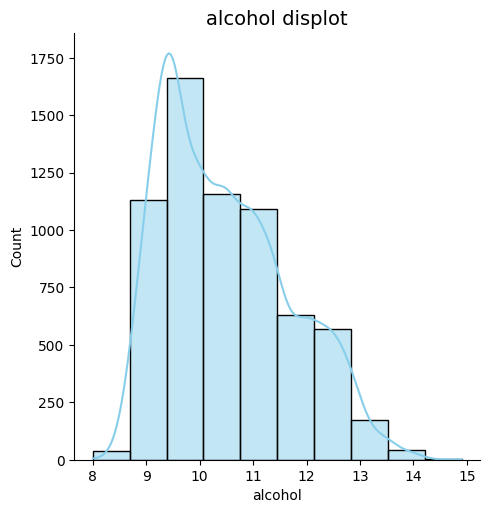

In [38]:
plt.figure(figsize=(8,5))
for features in num_col:
    sns.displot(x=features, data=data,kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.title(f"{features} displot", fontsize=14)
    plt.show()

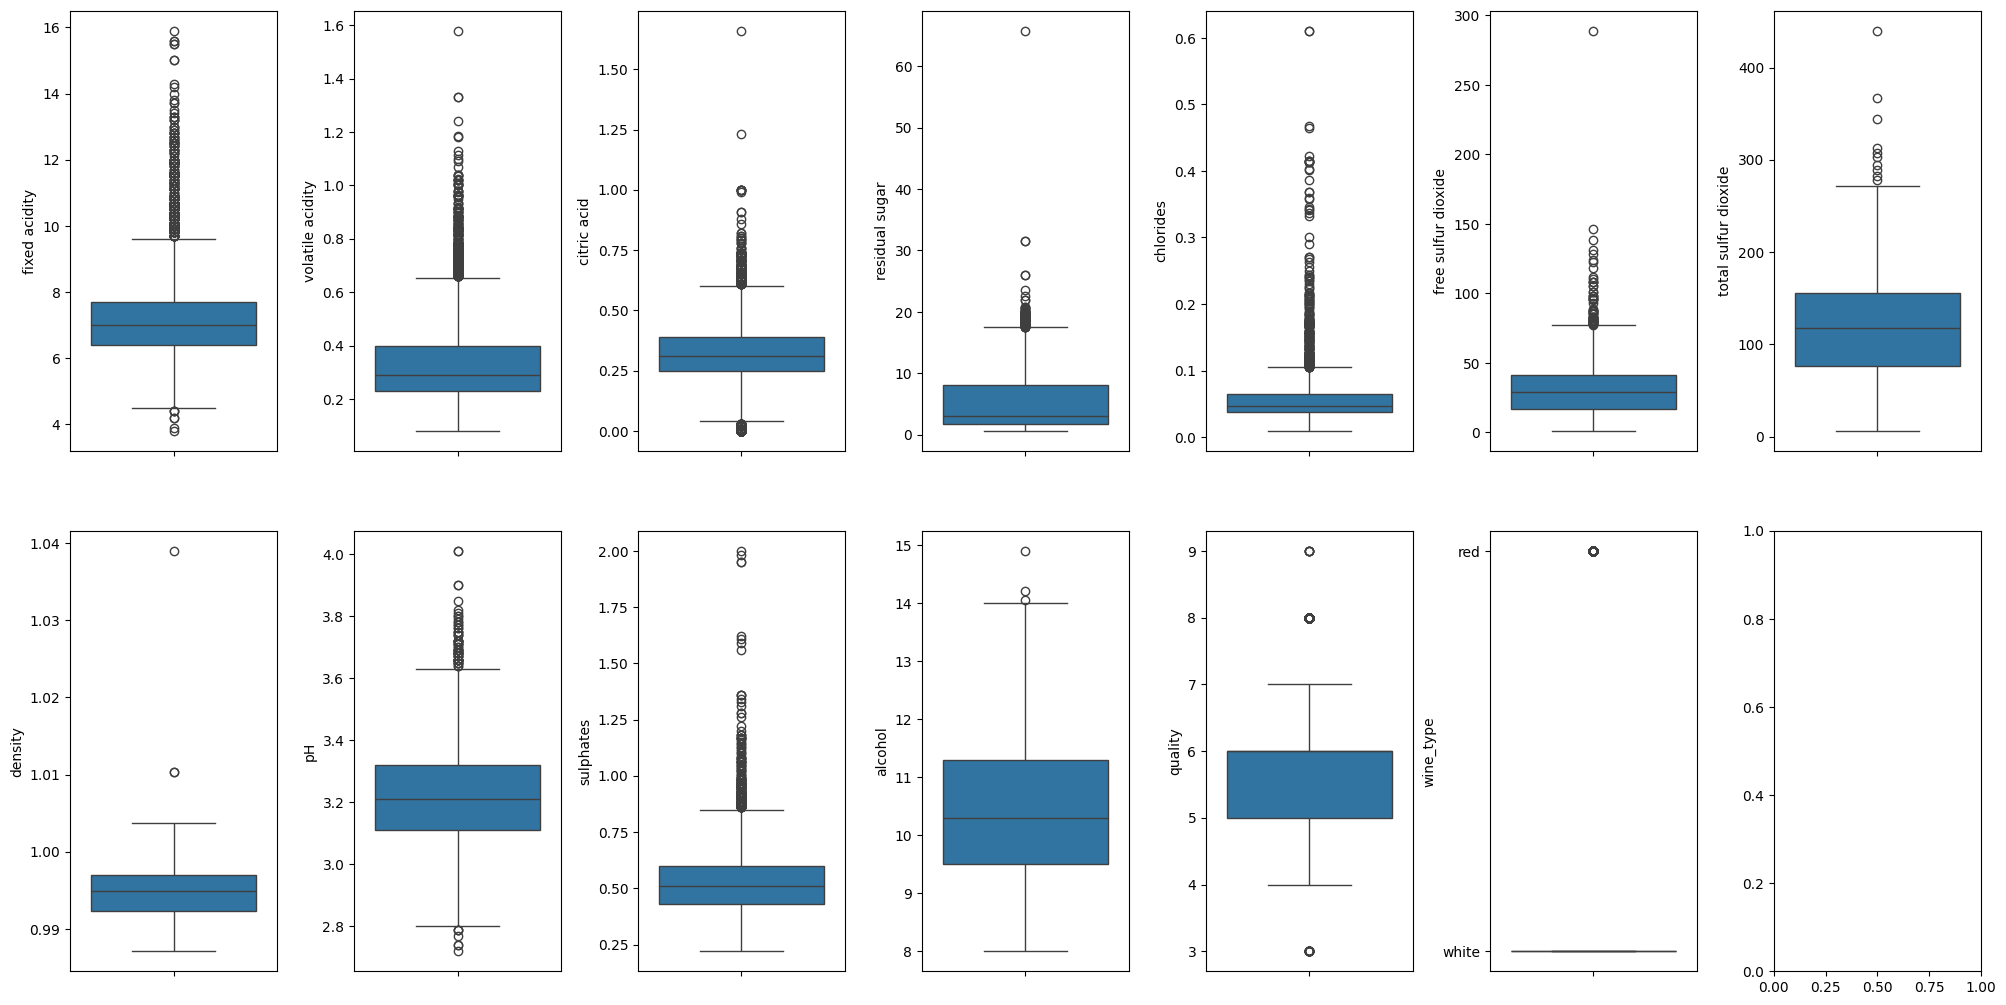

In [39]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

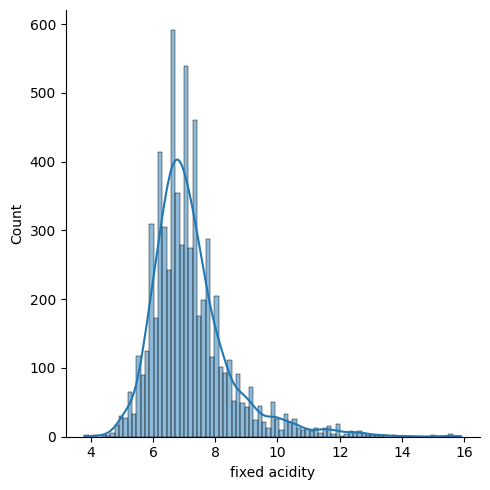

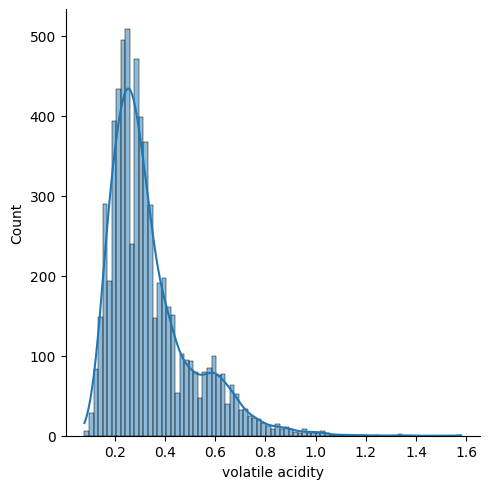

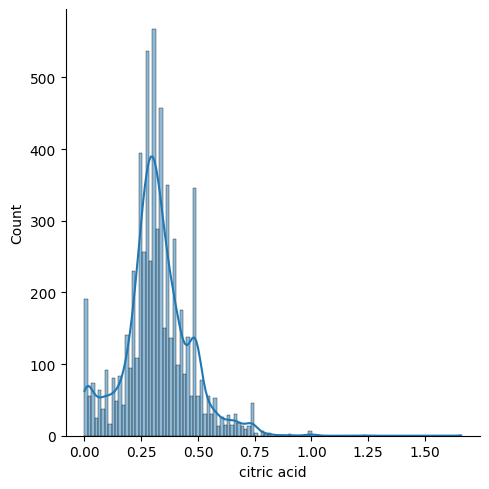

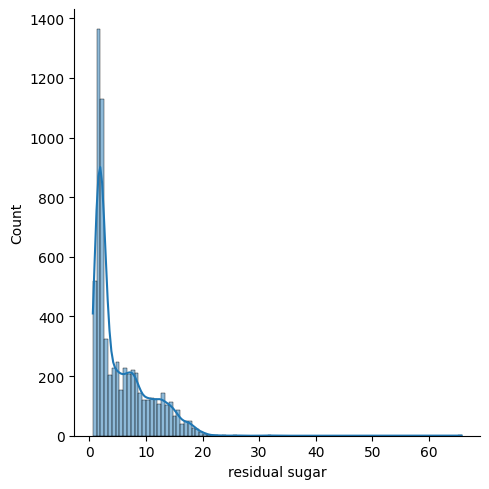

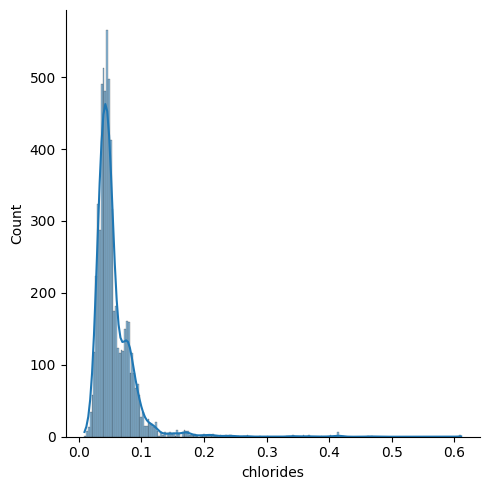

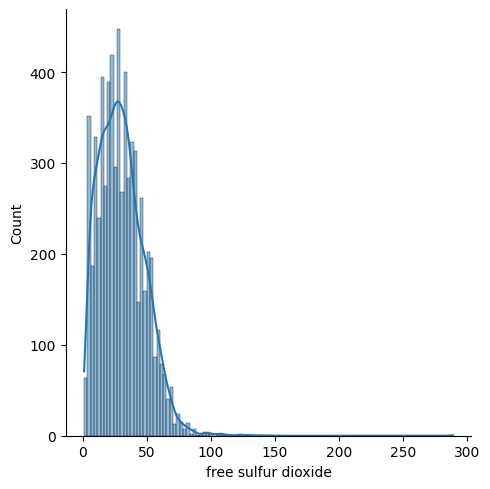

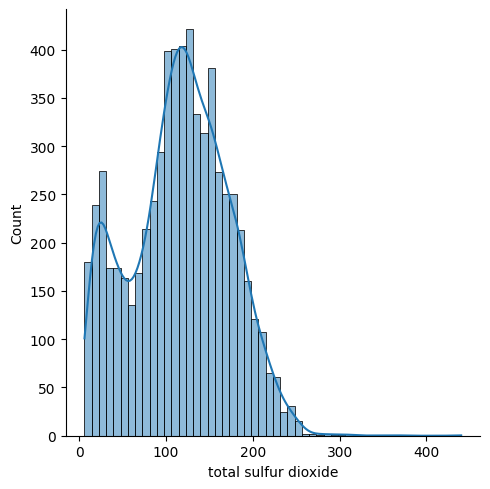

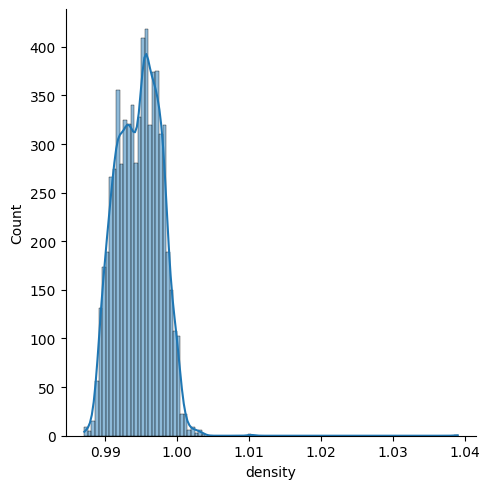

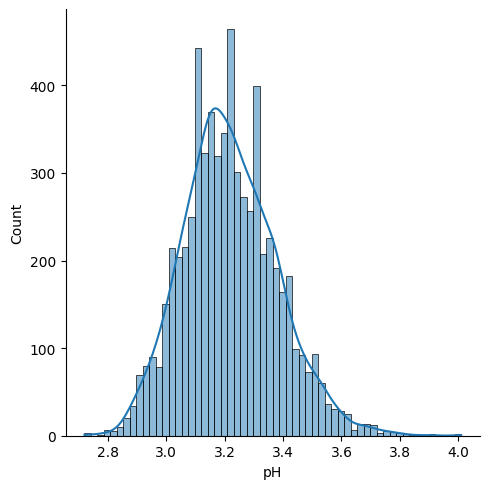

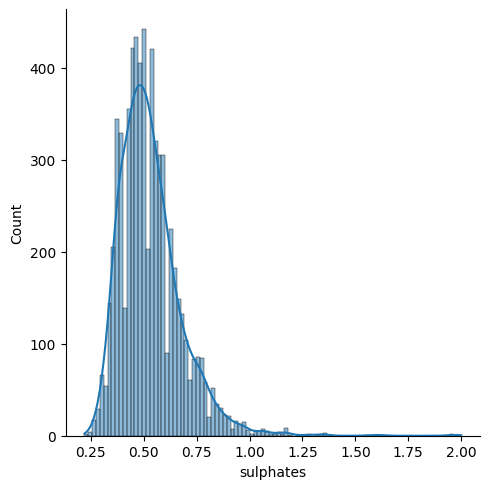

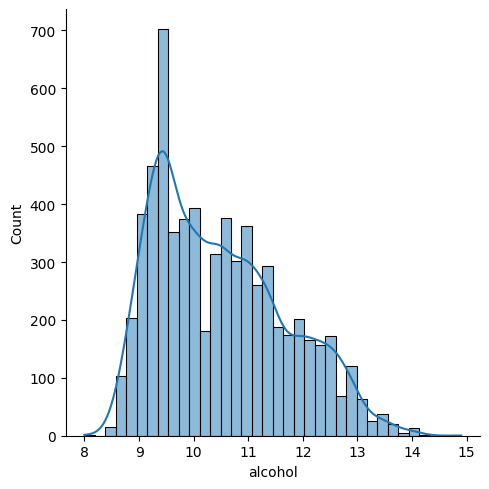

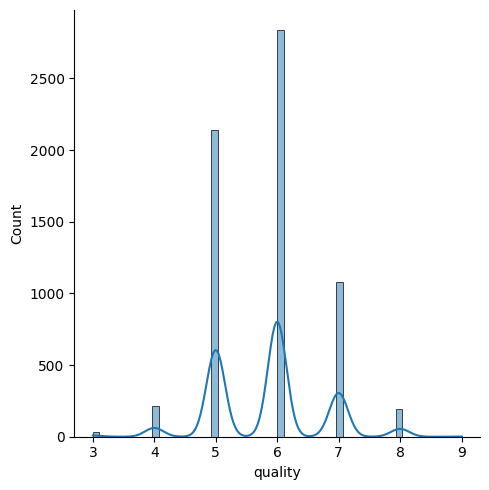

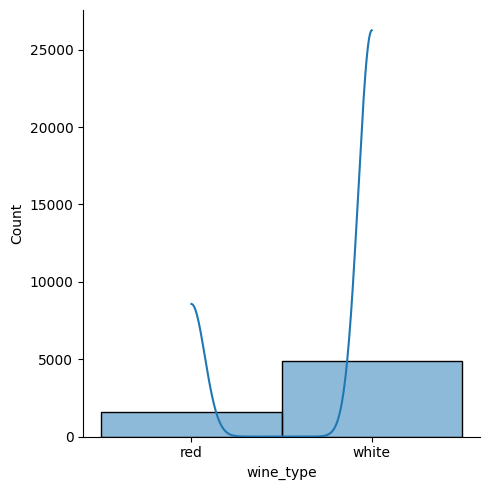

In [40]:
for col, value in data.items():
    if col != 'type':
        sns.displot(value,kde=True)


In [41]:
skewed_features = ['volatile acidity','residual sugar','chlorides','free sulfur dioxide','sulphates']

for feature in skewed_features:
    # log1p transformation (log(1 + x))
    data[feature] = np.log1p(data[feature])

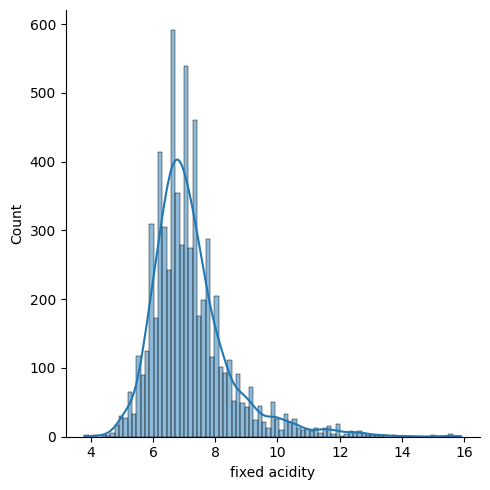

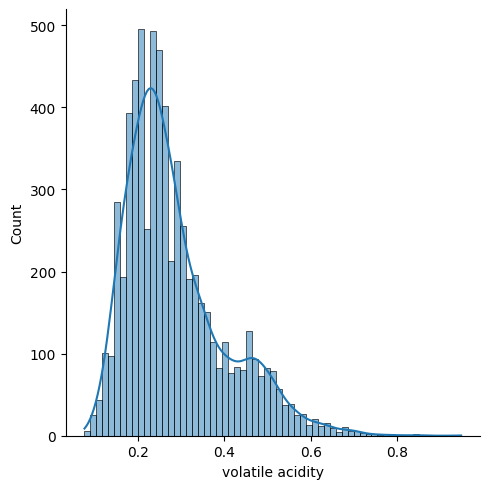

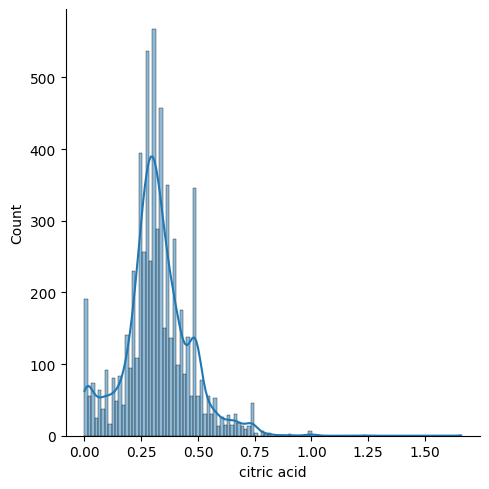

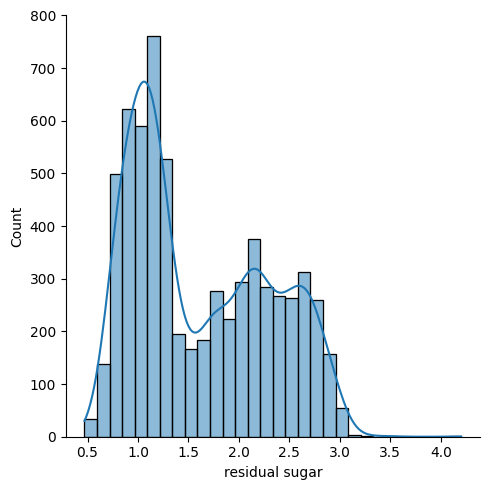

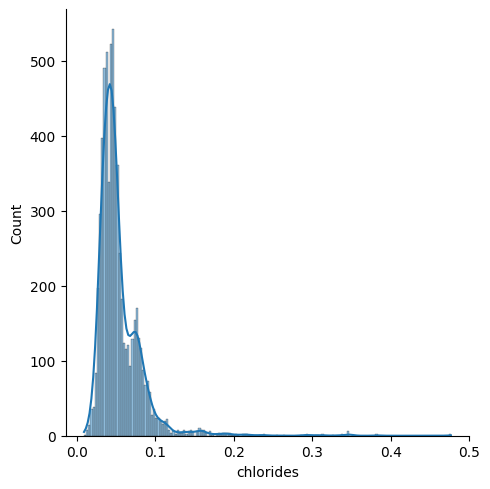

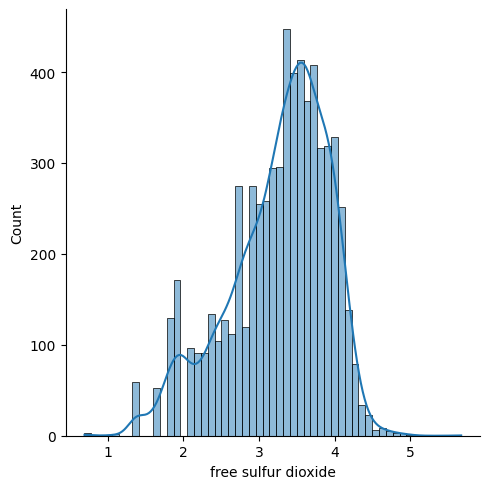

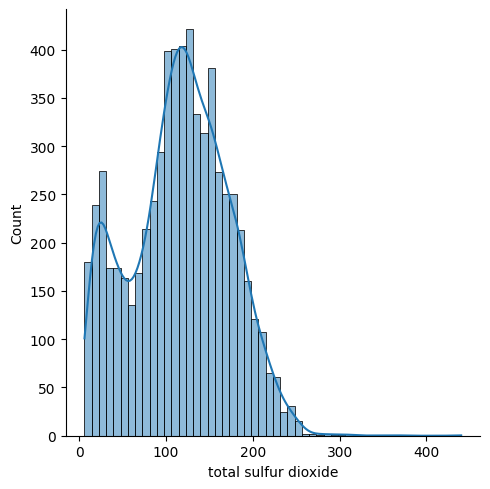

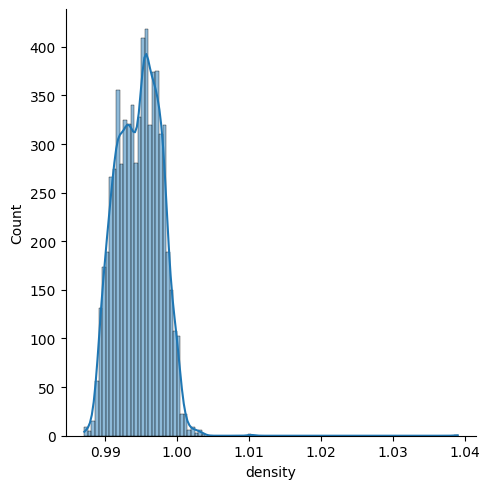

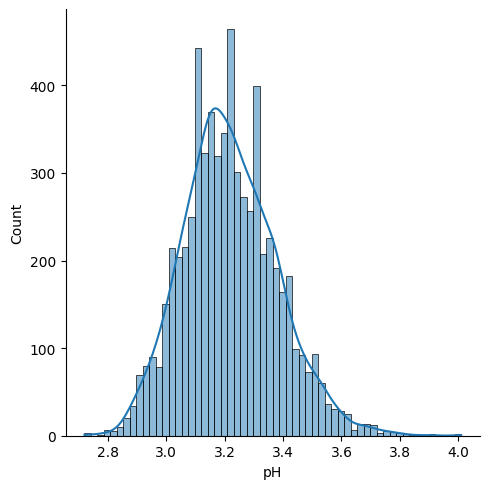

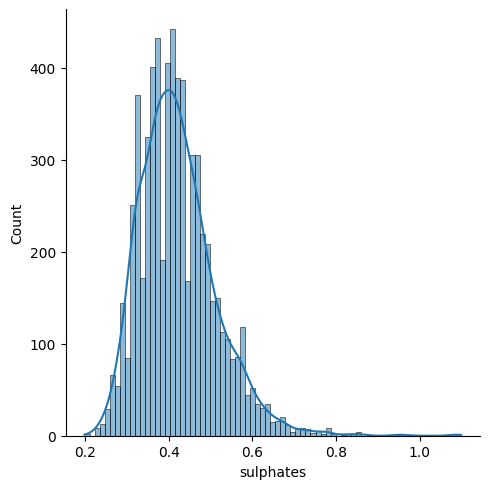

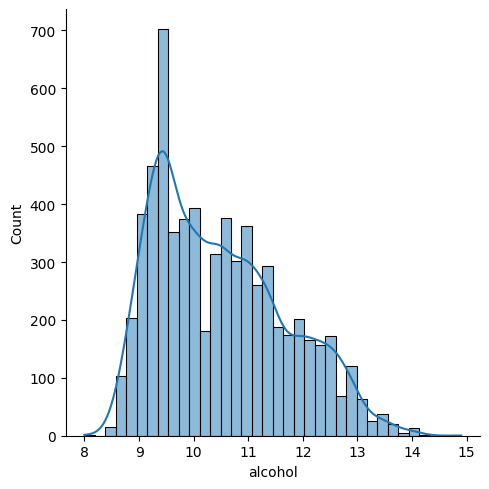

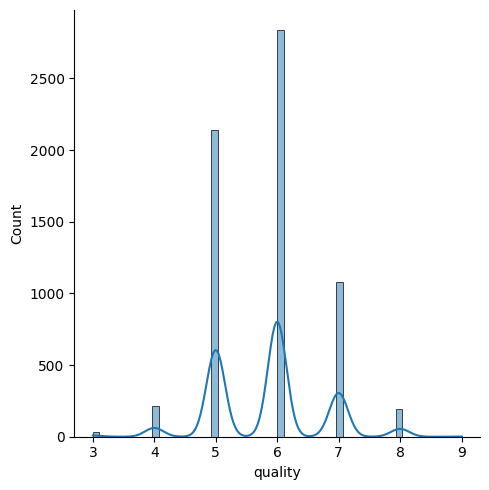

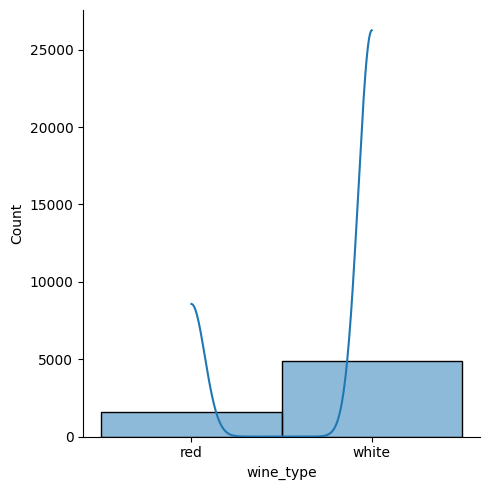

In [42]:
for col, value in data.items():
    if col != 'type':
        sns.displot(value,kde=True)


In [43]:
data['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [44]:
data = pd.get_dummies(data, columns=['wine_type'], drop_first=True, dtype=int)

In [45]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_white
0,7.4,0.530628,0.00,1.064711,0.073250,2.484907,34.0,0.99780,3.51,0.444686,9.4,5,0
1,7.8,0.631272,0.00,1.280934,0.093490,3.258097,67.0,0.99680,3.20,0.518794,9.8,5,0
2,7.8,0.565314,0.04,1.193922,0.088011,2.772589,54.0,0.99700,3.26,0.500775,9.8,5,0
3,11.2,0.246860,0.56,1.064711,0.072321,2.890372,60.0,0.99800,3.16,0.457425,9.8,6,0
4,7.4,0.530628,0.00,1.064711,0.073250,2.484907,34.0,0.99780,3.51,0.444686,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.190620,0.29,0.955511,0.038259,3.218876,92.0,0.99114,3.27,0.405465,11.2,6,1
6493,6.6,0.277632,0.36,2.197225,0.045929,4.060443,168.0,0.99490,3.15,0.378436,9.6,5,1
6494,6.5,0.215111,0.19,0.788457,0.040182,3.433987,111.0,0.99254,2.99,0.378436,9.4,6,1
6495,5.5,0.254642,0.30,0.741937,0.021761,3.044522,110.0,0.98869,3.34,0.322083,12.8,7,1


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = data.drop("quality", axis=1)
y = data["quality"]
oversample = SMOTE(k_neighbors=4,random_state=42)
X, y = oversample.fit_resample(X, y)

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<Axes: >

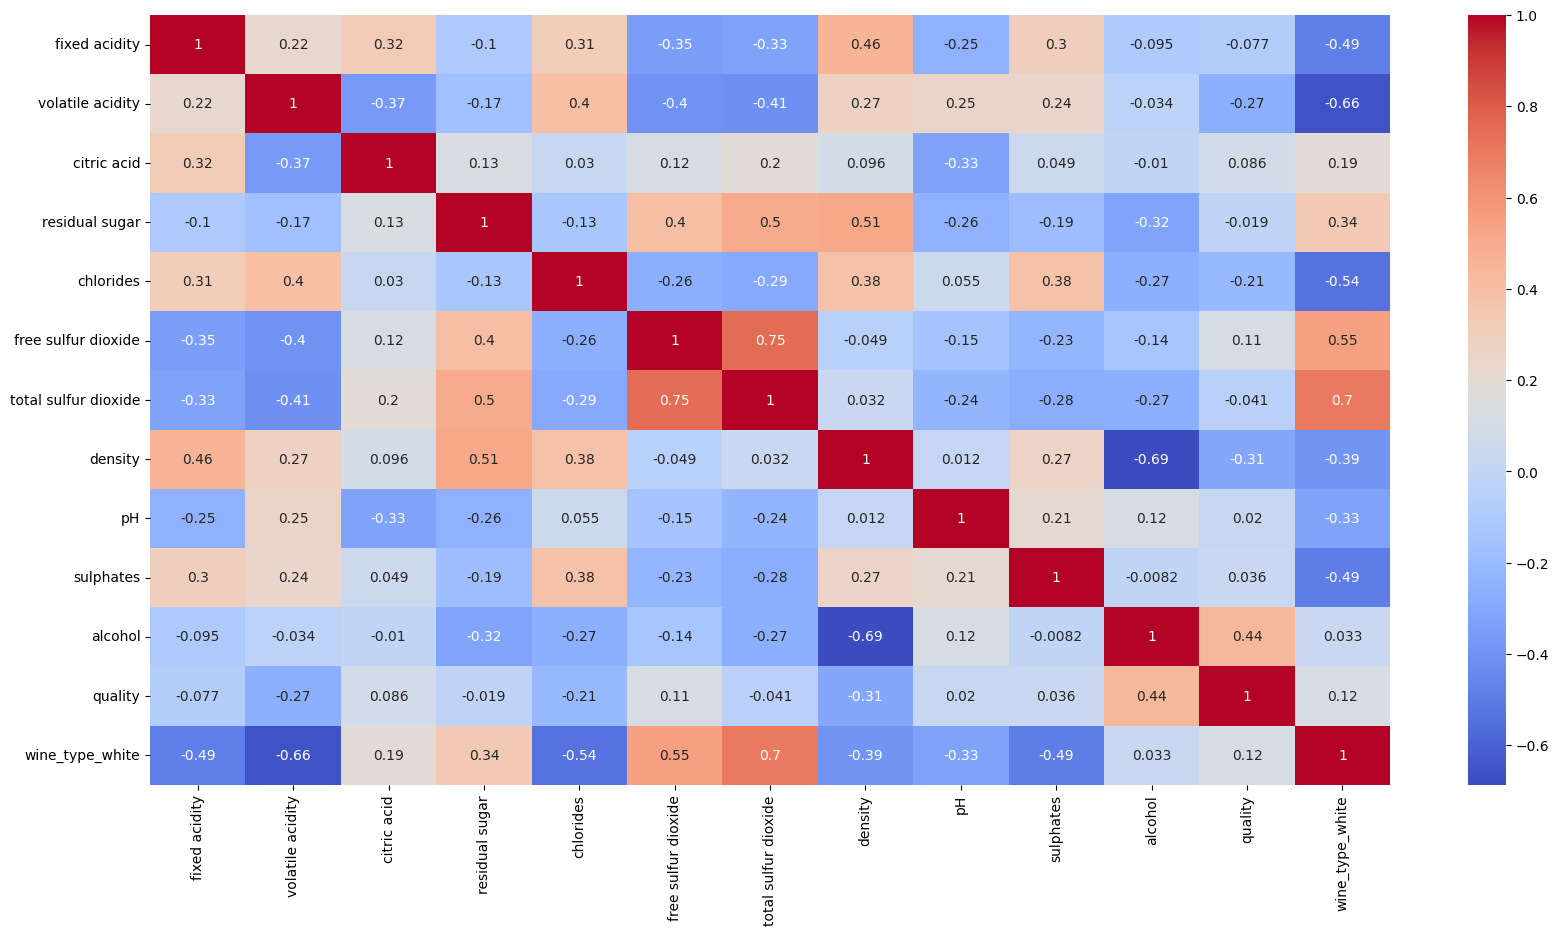

In [47]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [21]:
y.value_counts()

quality
5    2836
6    2836
7    2836
4    2836
8    2836
3    2836
9    2836
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [26]:
param_grids = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200,50,30,150,90,40],
            "max_depth": [None, 10, 20,5,15,30,7,8],
            "min_samples_split": [2, 5,3,4,7,3,9]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200,50,30,150,90,10,300,40],
            "max_depth": [-1, 10,5,7,8,9,10,30,15],
            "learning_rate": [0.1, 0.01]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    }
}


In [27]:
best_models = {}

for name, mp in param_grids.items():
    print(f"🔎 Running GridSearch for {name}...")
    grid = GridSearchCV(
        estimator=mp["model"],
        param_grid=mp["params"],
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Best CV Score: {grid.best_score_:.4f}")


🔎 Running GridSearch for RandomForest...
Best Params for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8766
🔎 Running GridSearch for LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2807
[LightGBM] [Info] Number of data points in the train set: 15881, number of used features: 12
[LightGBM] [Info] Start training from score -1.945784
[LightGBM] [Info] Start training from score -1.945784
[LightGBM] [Info] Start training from score -1.945784
[LightGBM] [Info] Start training from score -1.946225
[LightGBM] [Info] Start training from score -1.945784
[LightGBM] [Info] Start training from score -1.945784
[LightGBM] [Info] Start training from score -1.946225
[LightGBM] [Warning] No further splits with positive gain, b

In [28]:
for name, model in best_models.items():
    print(f"\n📊 Evaluation for {name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



📊 Evaluation for RandomForest:
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       567
           4       0.92      0.98      0.95       567
           5       0.79      0.77      0.78       567
           6       0.74      0.62      0.68       568
           7       0.82      0.88      0.85       567
           8       0.95      0.98      0.96       567
           9       1.00      1.00      1.00       568

    accuracy                           0.89      3971
   macro avg       0.89      0.89      0.89      3971
weighted avg       0.89      0.89      0.89      3971


📊 Evaluation for LightGBM:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       567
           4       0.94      0.98      0.96       567
           5       0.80      0.77      0.78       567
           6       0.71      0.71      0.71       568
           7       0.85      0.84      0.84       567
           8      